# Source and Sink in a Freestream

In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt

In [2]:
N = 200
x_start, x_end = -4.0, 4.0
y_start, y_end = -2.0, 2.0
x = np.linspace(x_start, x_end, N)
y = np.linspace(y_start, y_end, N)

X, Y = np.meshgrid(x, y)

# Stream Flow

In [3]:
u_inf = 1.0
u_freestream = u_inf * np.ones((N, N), dtype=float)
v_freestream = np.zeros((N, N), dtype=float)

psi_freestream = u_inf * Y

In [5]:
def get_velocity(strength, xs, ys, X, Y):
    u = strength/(2*np.pi)*(X - xs)/((X - xs)**2 + (Y - ys)**2)
    v = strength/(2*np.pi)*(Y - ys)/((X - xs)**2 + (Y - ys)**2)
    return u, v

In [12]:
def get_stream_function(strength, xs, ys, X, Y):
    psi = strength/(2*np.pi)*np.arctan2((Y - ys), (X - xs))
    return psi

# Computation of Source Flow Velocity and Streamlines

In [68]:
strength_source = 5.0
x_source, y_source = -1.0, 0.0
# Compute velocity field
u_source, v_source = get_velocity(strength_source, x_source, y_source, X, Y)
# Calculate stream function
psi_source = get_stream_function(strength_source, x_source, y_source, X, Y)

# Calculation of Stream Flow and Source Flow

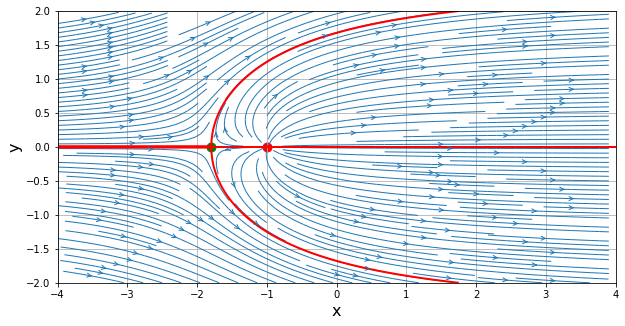

In [69]:
u = u_freestream + u_source
v = v_freestream + v_source
psi = psi_freestream + psi_source
# Stagnation point
x_stag = x_source - strength_source/(2*np.pi*u_inf)
y_stag = y_source

width = 10
height = (y_end - y_start)/(x_end - x_start) * width
plt.figure(figsize=(width, height))
plt.grid()
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.scatter(x_source, y_source, color='red', s=80, marker='o')
plt.scatter(x_stag, y_stag, color='g', s=80, marker='o')
# Dividing streamline
plt.contour(X, Y, psi, levels=[-strength_source/2, 0, strength_source/2], colors='red', linewidths=2, linestyles='solid');

# Challenge Question

What is the maximum width of the Rankine half body?

In [70]:
b = strength_source/(2*u_inf)
max_width = 2*b
max_width

5.0

# Source-Sink Pair in a Uniform Flow

In [75]:
strength_sink = -5.0
x_sink, y_sink = 1.0, 0.0
u_sink, v_sink = get_velocity(strength_sink, x_sink, y_sink, X, Y)
psi_sink = get_stream_function(strength_sink, x_sink, y_sink, X, Y)

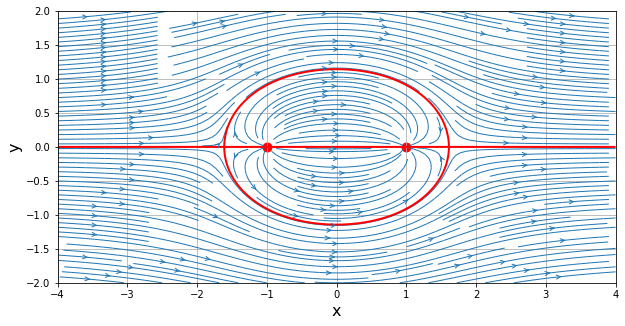

In [76]:
u = u_freestream + u_source + u_sink
v = v_freestream + v_source + v_sink
psi = psi_freestream + psi_source + psi_sink

x_stag = x_source - strength_source/(2*np.pi*u_inf)
y_stag = y_source

width = 10
height = (y_end - y_start)/(x_end - x_start) * width
plt.figure(figsize=(width, height))
plt.grid()
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.scatter([x_source, x_sink], [y_source, y_sink], color='red', s=80, marker='o')
# Dividing streamline
plt.contour(X, Y, psi, levels=[-strength_source/2, 0, strength_source/2], colors='red', linewidths=2, linestyles='solid');

# Bernoulli's Equation and the Pressure Coefficient

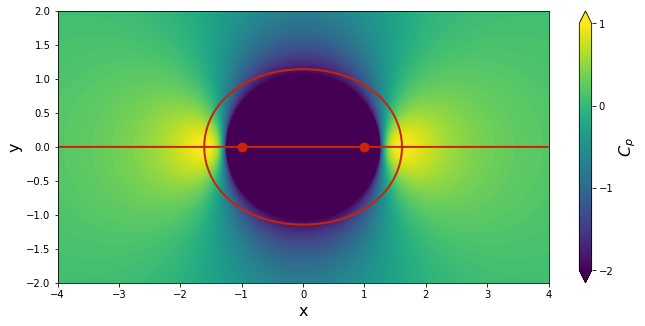

In [39]:
# compute the pressure coefficient field
cp = 1.0 - (u**2 + v**2) / u_inf**2

# plot the pressure coefficient field
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(1.1 * width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
contf = plt.contourf(X, Y, cp, levels=np.linspace(-2.0, 1.0, 100), extend='both')
cbar = plt.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
plt.scatter([x_source, x_sink], [y_source, y_sink], color='#CD2305', s=80, marker='o')
plt.contour(X, Y, psi, levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid');